<a href="https://colab.research.google.com/github/codedreamerD/ilttech/blob/main/ILT_TECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py

import streamlit as st
st.header('Proyek Analisis Data')

Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.196.36.61:8501

⠹⠸⠼⠴⠦⠧your url is: https://rare-grapes-trade.loca.lt
  Stopping...
^C


# Data Wrangling
## Gathering Data
### Membaca Berbagai Tipe Data Menggunakan Pandas

In [ ]:
import pandas as pd

df = pd.read_csv("day.csv", delimiter=",")

In [ ]:
import pandas as pd

df = pd.read_csv("hour.csv", delimiter=",")

### Menggabungkan Beberapa Data Menjadi Satu DataFrame

In [ ]:
import pandas as pd

day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# For example, if the column is named 'dteday' in day_df and 'day' in hour_df:
new_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="dteday",  # Replace with the actual column name in day_df
    right_on="dteday"  # Replace with the actual column name in hour_df
)

## Assesing Data
### Missing value

In [ ]:
import pandas as pd
day_df = pd.read_csv("day.csv")

day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
import pandas as pd
hour_df = pd.read_csv("hour.csv")

hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Invalid value

In [ ]:
import pandas as pd

day_df = pd.read_csv("day.csv")
day_df.duplicated().sum()

0

In [ ]:
import pandas as pd

hour_df = pd.read_csv("hour.csv")
hour_df.duplicated().sum()

0

## Cleaning Data
### Dropping

In [ ]:
import pandas as pd

day_df = pd.read_csv("day.csv")

day_df.dropna(axis=0, inplace=True)

In [ ]:
import pandas as pd

hour_df = pd.read_csv("hour.csv")

hour_df.dropna(axis=0, inplace=True)

### Imputation

In [ ]:
import pandas as pd

day_df=pd.read_csv('day.csv')

day_df.yr.fillna(value=day_df['yr'].mean(), inplace=True)

<ipython-input-23-52d3c8d3eff4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.yr.fillna(value=day_df['yr'].mean(), inplace=True)


# Membaca Dataset

In [ ]:
import pandas as pd

# Load dataset
day_df = pd.read_csv("day.csv")

# Menampilkan 5 baris pertama dari dataset harian
print(day_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [ ]:
import pandas as pd

# Load dataset
hour_df = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari dataset per jam
print(hour_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# Melihat Informasi Umum tentang Dataset

In [ ]:
# Melihat informasi dataset
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
# Melihat informasi dataset
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
# Melihat statistik deskriptif
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [ ]:
# Melihat statistik deskriptif
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

# Visualisasi Distribusi Penyewaan Sepeda

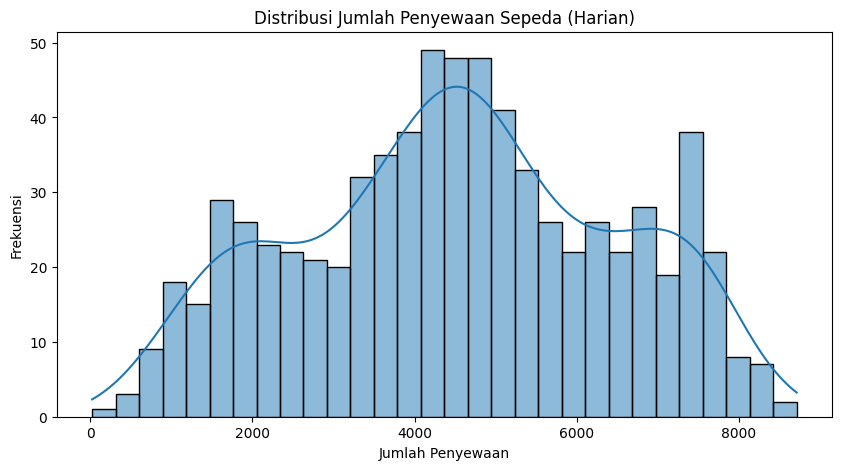

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram jumlah penyewaan harian
plt.figure(figsize=(10, 5))
sns.histplot(day_df["cnt"], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda (Harian)")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

# Melihat Tren Penyewaan Sepeda berdasarkan Musim

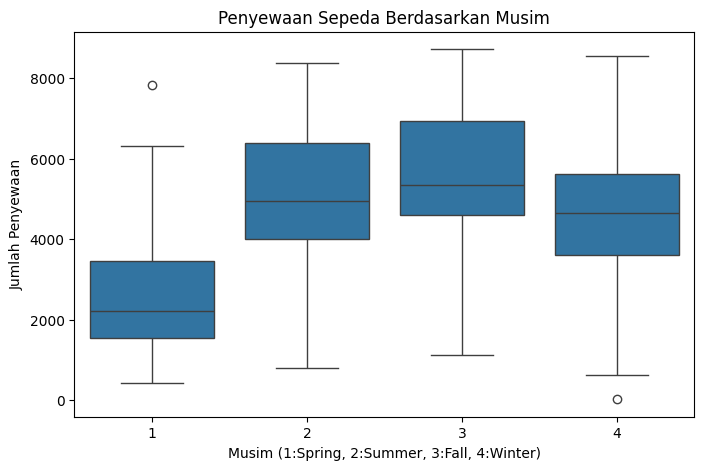

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="season", y="cnt", data=day_df)
plt.title("Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim (1:Spring, 2:Summer, 3:Fall, 4:Winter)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

#Melihat Pengaruh Cuaca terhadap Penyewaan Sepeda

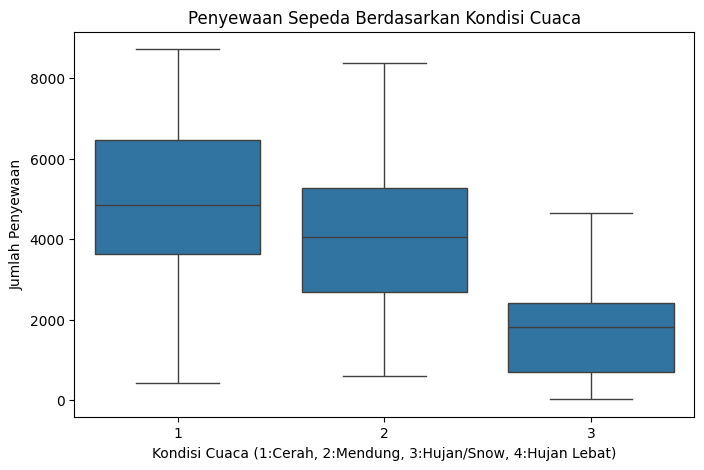

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.title("Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1:Cerah, 2:Mendung, 3:Hujan/Snow, 4:Hujan Lebat)")
plt.ylabel("Jumlah Penyewaan")
plt.show()

Penjelasan Singkat:

Kode di atas membaca dataset dan menampilkan informasi dasarnya.
Histogram digunakan untuk melihat distribusi jumlah penyewaan sepeda.
Boxplot membantu memahami bagaimana musim dan kondisi cuaca memengaruhi jumlah penyewaan.

In [ ]:
!python --version

Python 3.11.11


In [ ]:
print("Hello, Dicoding!")

Hello, Dicoding!


In [ ]:
# cv str to int
phone = "081289936820"
print(type(phone))

phone_int = int(phone)
print(type(phone_int))

<class 'str'>
<class 'int'>


In [ ]:
# str
color = "red"
print(type(color))

<class 'str'>


In [ ]:
# int
length = "10"

https://colab.research.google.com/drive/1gyDzgKi6BokKz0G_8nSbKl_1t6nyH-6Q#scrollTo=dGGftZ9LabgwV

# Comparison

In [ ]:
print (1<10)
print("Linux" == "Windows")
###

In [ ]:
# Func
def greeting(name):
  return 'Hello, ' + name

print(greeting('Dicoding 2025'))

Hello, Dicoding 2025


In [ ]:
# conditional & if statement
hour = 10
if hour < 12:
  print("Good morning!")
elif hour < 18:
  print("Good afternoon!")
else:
  print("Good evening!")

Good morning!


In [ ]:
def check(number):
  if number > 0:
    return "Positive"
  elif number == 0:
    return "Zero"
  else:
    return "Negative"

print(check(10))

Positive


In [ ]:
# Loops
x = 7
while x > 0:
  print("positive x=" + str(x))
  x -= 1
  if x == 4:
    break
    print("after break x=" + str(x))

positive x=7
positive x=6
positive x=5


In [ ]:
sentences = ['Dicoding is cool', 'I exercise every day']
for word in sentences:
  print(word)
  print(word.split())

Dicoding is cool
['Dicoding', 'is', 'cool']
I exercise every day
['I', 'exercise', 'every', 'day']


In [ ]:
sentences = ['Dicoding is cool', 'I exercise every day']
for sentences in sentences:
  print(sentences)
  print(sentences.split())

Dicoding is cool
['Dicoding', 'is', 'cool']
I exercise every day
['I', 'exercise', 'every', 'day']


In [ ]:
# list
fruits = ['apple','banana','orange']
for fruit in fruits:
  print(fruit)

apple
banana
orange


In [ ]:
#list w diff data types
mixed_list = [1, 2.5, 'apple', True, [3, 4, 5]]

#accesing elements
print(mixed_list[2]) # accessing a str
print(mixed_list[4]) # accessing a nested list

#modify the list
mixed_list[1] = '10.5'
print(mixed_list)

for item in mixed_list:
  print(item)
  print(type(item))
  print()

apple
[3, 4, 5]
[1, '10.5', 'apple', True, [3, 4, 5]]
1
<class 'int'>

10.5
<class 'str'>

apple
<class 'str'>

True
<class 'bool'>

[3, 4, 5]
<class 'list'>



In [ ]:
outer_list = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

for inner_list in outer_list:
  for item in inner_list:
    print(item)

1
2
3
4
5
6
7
8
9


In [ ]:
matrix = [
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9]
]

print (matrix[1][2])

matrix[0][1] = 10
matrix[2].append(10)
print(matrix)

6
[[1, 10, 3], [4, 5, 6], [7, 8, 9, 10]]


In [ ]:
fruits = ['apple', 'banana', 'orange']

length_of_fruits = len(fruits)
print(length_of_fruits)

3


In [ ]:
# indexing
numbers = [0,1,2,3,4,5,6,7,8,9]
print(numbers[3])
print(numbers[0:3])
print(numbers[:3])
print(numbers[3:])
print(numbers[-3])
print(numbers[::-1])
print(numbers[1:9:2])

3
[0, 1, 2]
[0, 1, 2]
[3, 4, 5, 6, 7, 8, 9]
7
[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
[1, 3, 5, 7]


In [ ]:
fruits.append('grape')
fruits.extend(['mango', 'pineapple'])
fruits += ['kiwi', 'strawberry']
fruits.insert(2, 'kiwi')
print(fruits)

['apple', 'banana', 'kiwi', 'kiwi', 'kiwi', 'orange', 'grape', 'mango', 'pineapple', 'grape', 'mango', 'pineapple', 'kiwi', 'strawberry', 'grape', 'mango', 'pineapple', 'kiwi', 'strawberry', 'grape', 'mango', 'pineapple', 'kiwi', 'strawberry']


In [ ]:
fruits.remove('grape')
removed_element = fruits.pop(2)
del fruits[0]

In [ ]:
# Using IN operator
colors = ['blue', 'yellow']
print('red' in colors)
print('blue' in colors)

False
True
